# <center>Laboratorium 5<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [58]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

***Zadanie 1.***  
Zaimplementuj interpolacje pierwszego stopnia. Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji liniowych w poszczególnych przedziałach.

***Podpowiedź***

poszczególne współczynniki przyjmują wartość:

$ a=\frac{y_{k+1}-y_k}{x_{k+1}-x_k}$

$ b=y-a*x_0$

***Przykład***


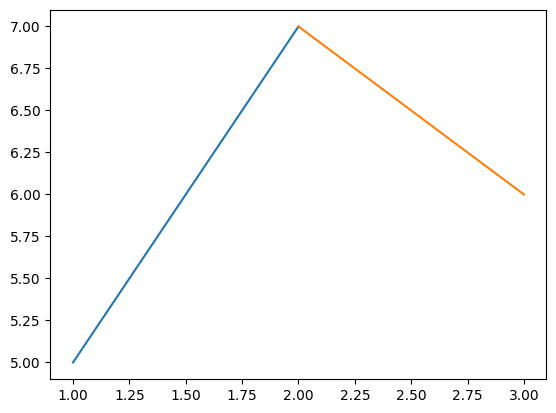

In [59]:
x=np.array([1,2,3])
y=np.array([5,7,6])

a,b=main.first_spline(x,y)
f = [[b[i],a[i]] for i in range(len(a))]

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]))

***Zadanie 2.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


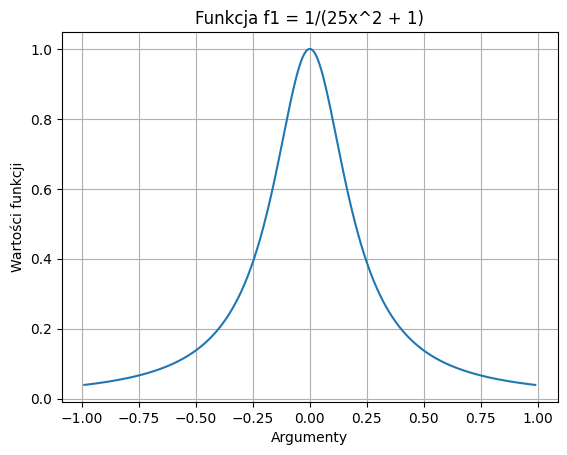

In [60]:
#Wywołanie zwykłej funkcji 
x = np.linspace(-0.99,0.99, 1000)
f1 = lambda x: 1 / (25 * x **2 + 1)
y = f1(x)
plt.plot(x, y)
plt.title('Funkcja f1 = 1/(25x^2 + 1)')
plt.xlabel("Argumenty")
plt.ylabel("Wartości funkcji")
plt.grid()
plt.show()


SPLINE


0.2285250085859184
0.06272265052679038
0.009976057104101987
0.0024629023410732698
2.4247870023641482e-05


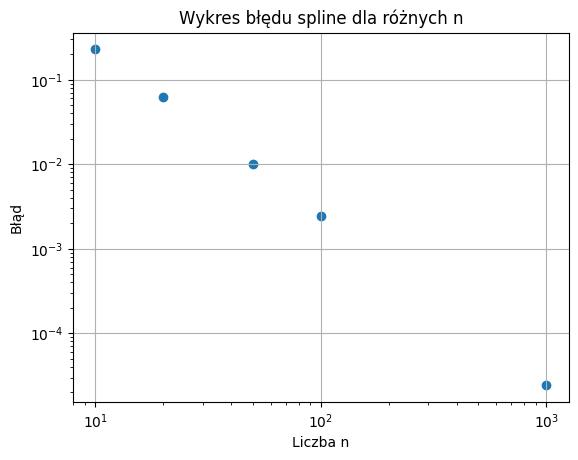

In [61]:
#dla n = 10 
x = np.linspace(-0.99, 0.99, 10)
a,b = main.first_spline(x, f1(x))
f_c = [[b[i],a[i]] for i in range(len(a))]

x10 = np.array([])
y10 = np.array([])

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],10)
    y_new = PolyCoefficients(x_new , f_c[i])
    y10 = np.append(y10, y_new)
    x10 = np.append(x10, x_new)

error10spline = main.L_inf(y10, f1(x10))
print(error10spline)

#dla n = 20 
x = np.linspace(-0.99, 0.99, 20)
a,b = main.first_spline(x, f1(x))
f_c = [[b[i],a[i]] for i in range(len(a))]

x20 = np.array([])
y20 = np.array([])

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],10)
    y_new = PolyCoefficients(x_new , f_c[i])
    y20 = np.append(y20, y_new)
    x20 = np.append(x20, x_new)

error20spline = main.L_inf(y20, f1(x20))
print(error20spline)

#dla n = 50 
x = np.linspace(-0.99, 0.99, 50)
a,b = main.first_spline(x, f1(x))
f_c = [[b[i],a[i]] for i in range(len(a))]

x50= np.array([])
y50 = np.array([])

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],10)
    y_new = PolyCoefficients(x_new , f_c[i])
    y50 = np.append(y50, y_new)
    x50 = np.append(x50, x_new)

error50spline = main.L_inf(y50, f1(x50))
print(error50spline)

#dla n = 100 
x = np.linspace(-0.99, 0.99, 100)
a,b = main.first_spline(x, f1(x))
f_c = [[b[i],a[i]] for i in range(len(a))]

x100 = np.array([])
y100 = np.array([])

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],10)
    y_new = PolyCoefficients(x_new , f_c[i])
    y100 = np.append(y100, y_new)
    x100 = np.append(x100, x_new)

error100spline = main.L_inf(y100, f1(x100))
print(error100spline)

#dla n = 1000 
x = np.linspace(-0.99, 0.99, 1000)
a,b = main.first_spline(x, f1(x))
f_c = [[b[i],a[i]] for i in range(len(a))]

x1000 = np.array([])
y1000 = np.array([])

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],10)
    y_new = PolyCoefficients(x_new , f_c[i])
    y1000 = np.append(y1000, y_new)
    x1000 = np.append(x1000, x_new)

error1000spline = main.L_inf(y1000, f1(x1000))
print(error1000spline)

errorspline = [error10spline, error20spline, error50spline, error100spline, error1000spline]
n = [10, 20, 50, 100, 1000]


plt.scatter(n, errorspline)
plt.xscale('log')
plt.yscale('log')
plt.title("Wykres błędu spline dla różnych n")
plt.xlabel("Liczba n")
plt.ylabel("Błąd")
plt.grid()
plt.show()





SCIPI

Blad 10 wynosi: 1.1102230246251565e-16
Blad 20 wynosi: 1.6653345369377348e-16
Blad 50 wynosi: 2.220446049250313e-16
Blad 100 wynosi: 2.220446049250313e-16
Blad 1000 wynosi: 3.3306690738754696e-16


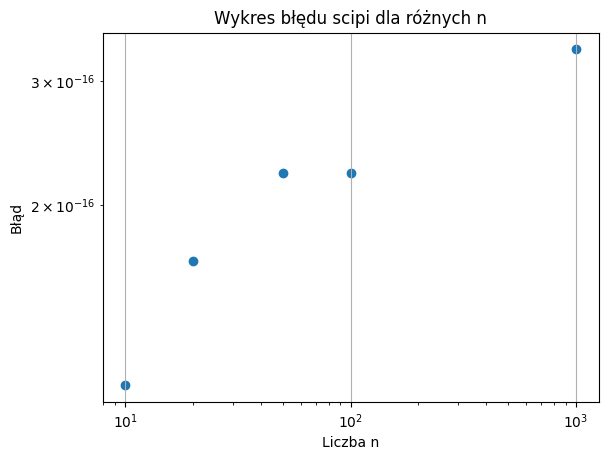

In [62]:
from scipy.interpolate import splprep, splev, splrep

#dla n = 10 
x = np.linspace(-0.99,0.99, 10)
y = f1(x)
tck, u = splprep([x, y], s=0)
new_points10 = splev(u, tck)
#plt.plot(new_points[0], new_points[1])
new10 = np.array(new_points10)
error10scipi =  main.L_inf(new10[1],y)
print("Blad 10 wynosi:" , error10scipi)

#dla n = 20 
x = np.linspace(-0.99,0.99, 20)
y = f1(x)
tck, u = splprep([x, y], s=0)
new_points20 = splev(u, tck)
#plt.plot(new_points[0], new_points[1])
new = np.array(new_points20)
error20scipi =  main.L_inf(new[1],y)
print("Blad 20 wynosi:" , error20scipi)

#dla n = 50 
x = np.linspace(-0.99,0.99, 50)
y = f1(x)
tck, u = splprep([x, y], s=0)
new_points50 = splev(u, tck)
#plt.plot(new_points[0], new_points[1])
new50 = np.array(new_points50)
error50scipi =  main.L_inf(new50[1],y)
print("Blad 50 wynosi:" , error50scipi)

#dla n = 100 
x = np.linspace(-0.99,0.99, 100)
y = f1(x)
tck, u = splprep([x, y], s=0)
new_points100 = splev(u, tck)
#plt.plot(new_points[0], new_points[1])
new100 = np.array(new_points100)
error100scipi =  main.L_inf(new100[1],y)
print("Blad 100 wynosi:" , error100scipi)

#dla n = 1000 
x = np.linspace(-0.99,0.99, 1000)
y = f1(x)
tck, u = splprep([x, y], s=0)
new_points1000 = splev(u, tck)
#plt.plot(new_points[0], new_points[1])
new1000 = np.array(new_points1000)
error1000scipi =  main.L_inf(new1000[1],y)
print("Blad 1000 wynosi:" , error1000scipi)


errorscipi = [error10scipi, error20scipi, error50scipi, error100scipi, error1000scipi]
n = [10, 20, 50, 100, 1000]


plt.scatter(n, errorscipi)
plt.xscale('log')
plt.yscale('log')
plt.title("Wykres błędu scipi dla różnych n")
plt.xlabel("Liczba n")
plt.ylabel("Błąd")
plt.grid()
plt.show()



BARYCENTRIC

Dla 10:  0.11190640247849926
Dla 20:  0.0066576129659542405
Dla 50:  0.00023415551512750987
Dla 100:  5.6955170209760375e-05
Dla 1000:  4.6759057426015715e-07
Errorbar:  [0.11190640247849926, 0.0066576129659542405, 0.00023415551512750987, 5.6955170209760375e-05, 4.6759057426015715e-07]


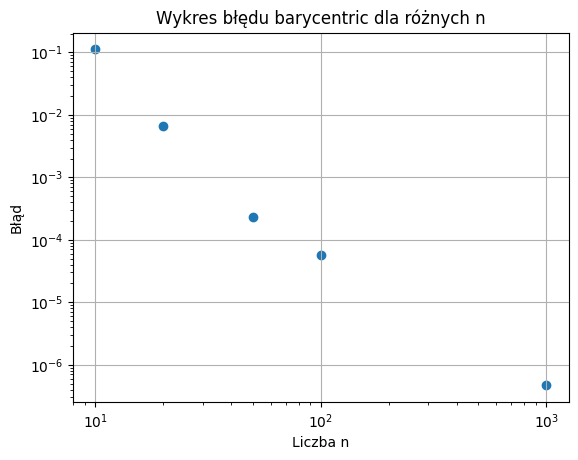

In [63]:
X = np.linspace(-0.99,0.99,1000)
#dla n = 10 
x10 = np.linspace(-1,1,10)
y10 = f1(x10)
w10 = main.bar_czeb_weights(9)
Y10 = main.barycentric_inte(x10,y10,w10,X)
error10bar = main.L_inf(Y10, f1(X))
print("Dla 10: " , error10bar)

#dla n = 20 
x20 = np.linspace(-1,1,20)
y20 = f1(x20)
w20 = main.bar_czeb_weights(19)
Y20 = main.barycentric_inte(x20,y20,w20,X)
error20bar = main.L_inf(Y20, f1(X))
print("Dla 20: " , error20bar)

#dla n = 50 
x50 = np.linspace(-1,1,50)
y50 = f1(x50)
w50 = main.bar_czeb_weights(49)
Y50 = main.barycentric_inte(x50,y50,w50,X)
error50bar = main.L_inf(Y50, f1(X))
print("Dla 50: " , error50bar)

#dla n = 100 
x100 = np.linspace(-1,1,100)
y100 = f1(x100)
w100 = main.bar_czeb_weights(99)
Y100 = main.barycentric_inte(x100,y100,w100,X)
error100bar = main.L_inf(Y100, f1(X))
print("Dla 100: " , error100bar)

#dla n = 1000 
x1000 = np.linspace(-1,1,1000)
y1000 = f1(x1000)
w1000 = main.bar_czeb_weights(999)
Y1000 = main.barycentric_inte(x1000,y1000,w1000,X)
error1000bar = main.L_inf(Y1000, f1(X))
print("Dla 1000: " , error1000bar)


errorbar = [error10bar , error20bar , error50bar , error100bar , error1000bar]
n = [10, 20, 50, 100, 1000]
print("Errorbar: ", errorbar)


plt.scatter(n, errorbar)
plt.xscale('log')
plt.yscale('log')
plt.title("Wykres błędu barycentric dla różnych n")
plt.xlabel("Liczba n")
plt.ylabel("Błąd")
plt.grid()
plt.show()




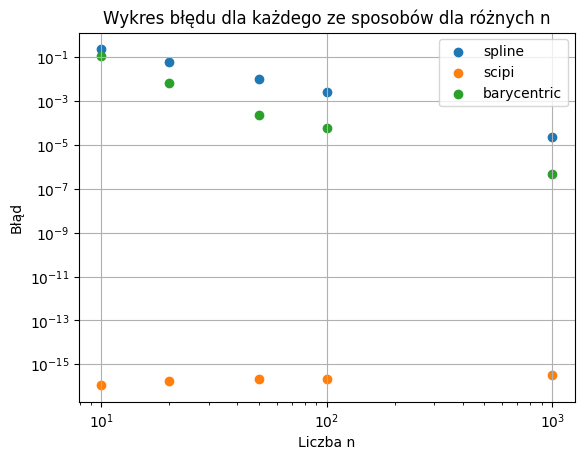

In [64]:
#Wykres wszytkich błędów na jednym wykresie 


plt.scatter(n, errorspline, label="spline")
plt.xscale('log')
plt.yscale('log')
plt.title("Wykres błędu dla każdego ze sposobów dla różnych n")
plt.xlabel("Liczba n")
plt.ylabel("Błąd")
plt.grid()
plt.scatter(n, errorscipi , label="scipi")
plt.scatter(n, errorbar , label = 'barycentric')
plt.legend()
plt.show()


***Zadanie 3.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


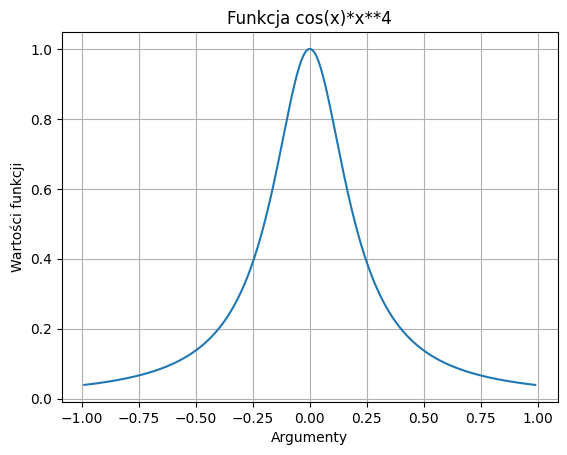

In [65]:
#Wywołanie zwykłej funkcji 
x = np.linspace(-0.99,0.99, 1000)
f2 = lambda x : np.cos(x)*x**4
y = f1(x)
plt.plot(x, y)
plt.title('Funkcja cos(x)*x**4')
plt.xlabel("Argumenty")
plt.ylabel("Wartości funkcji")
plt.grid()
plt.show()

SPLINE


0.01510320146730662
0.003392248085543559
0.0005162620211771052
0.00012687183089651888
1.2465544217687974e-06


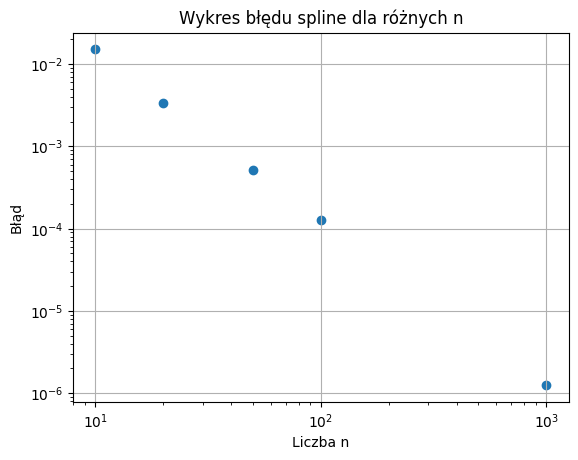

In [66]:

#dla n = 10 
x = np.linspace(-0.99, 0.99, 10)
a,b = main.first_spline(x, f2(x))
f_c = [[b[i],a[i]] for i in range(len(a))]

x10 = np.array([])
y10 = np.array([])

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],10)
    y_new = PolyCoefficients(x_new , f_c[i])
    y10 = np.append(y10, y_new)
    x10 = np.append(x10, x_new)

error10spline = main.L_inf(y10, f2(x10))
print(error10spline)

#dla n = 20 
x = np.linspace(-0.99, 0.99, 20)
a,b = main.first_spline(x, f2(x))
f_c = [[b[i],a[i]] for i in range(len(a))]

x20 = np.array([])
y20 = np.array([])

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],10)
    y_new = PolyCoefficients(x_new , f_c[i])
    y20 = np.append(y20, y_new)
    x20 = np.append(x20, x_new)

error20spline = main.L_inf(y20, f2(x20))
print(error20spline)

#dla n = 50 
x = np.linspace(-0.99, 0.99, 50)
a,b = main.first_spline(x, f2(x))
f_c = [[b[i],a[i]] for i in range(len(a))]

x50= np.array([])
y50 = np.array([])

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],10)
    y_new = PolyCoefficients(x_new , f_c[i])
    y50 = np.append(y50, y_new)
    x50 = np.append(x50, x_new)

error50spline = main.L_inf(y50, f2(x50))
print(error50spline)

#dla n = 100 
x = np.linspace(-0.99, 0.99, 100)
a,b = main.first_spline(x, f2(x))
f_c = [[b[i],a[i]] for i in range(len(a))]

x100 = np.array([])
y100 = np.array([])

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],10)
    y_new = PolyCoefficients(x_new , f_c[i])
    y100 = np.append(y100, y_new)
    x100 = np.append(x100, x_new)

error100spline = main.L_inf(y100, f2(x100))
print(error100spline)

#dla n = 1000 
x = np.linspace(-0.99, 0.99, 1000)
a,b = main.first_spline(x, f2(x))
f_c = [[b[i],a[i]] for i in range(len(a))]

x1000 = np.array([])
y1000 = np.array([])

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],10)
    y_new = PolyCoefficients(x_new , f_c[i])
    y1000 = np.append(y1000, y_new)
    x1000 = np.append(x1000, x_new)

error1000spline = main.L_inf(y1000, f2(x1000))
print(error1000spline)

errorspline = [error10spline, error20spline, error50spline, error100spline, error1000spline]
n = [10, 20, 50, 100, 1000]


plt.scatter(n, errorspline)
plt.xscale('log')
plt.yscale('log')
plt.title("Wykres błędu spline dla różnych n")
plt.xlabel("Liczba n")
plt.ylabel("Błąd")
plt.grid()
plt.show()

SCIPI

Blad 10 wynosi: 2.220446049250313e-16
Blad 20 wynosi: 1.1102230246251565e-16
Blad 50 wynosi: 1.1102230246251565e-16
Blad 100 wynosi: 1.1102230246251565e-16
Blad 1000 wynosi: 2.220446049250313e-16


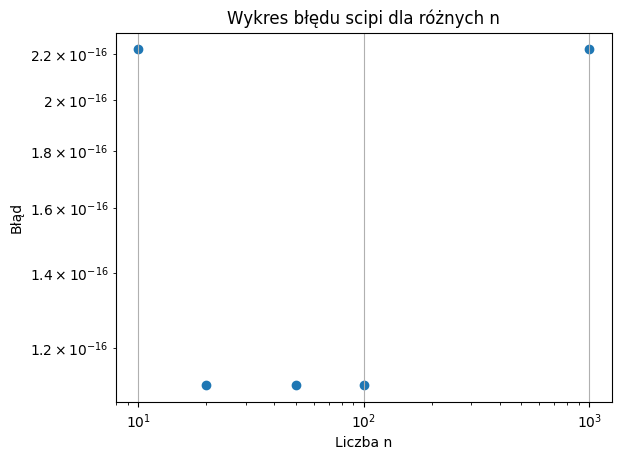

In [67]:
from scipy.interpolate import splprep, splev, splrep

#dla n = 10 
x = np.linspace(-0.99,0.99, 10)
y = f2(x)
tck, u = splprep([x, y], s=0)
new_points10 = splev(u, tck)
#plt.plot(new_points[0], new_points[1])
new10 = np.array(new_points10)
error10scipi =  main.L_inf(new10[1],y)
print("Blad 10 wynosi:" , error10scipi)

#dla n = 20 
x = np.linspace(-0.99,0.99, 20)
y = f2(x)
tck, u = splprep([x, y], s=0)
new_points20 = splev(u, tck)
#plt.plot(new_points[0], new_points[1])
new = np.array(new_points20)
error20scipi =  main.L_inf(new[1],y)
print("Blad 20 wynosi:" , error20scipi)

#dla n = 50 
x = np.linspace(-0.99,0.99, 50)
y = f2(x)
tck, u = splprep([x, y], s=0)
new_points50 = splev(u, tck)
#plt.plot(new_points[0], new_points[1])
new50 = np.array(new_points50)
error50scipi =  main.L_inf(new50[1],y)
print("Blad 50 wynosi:" , error50scipi)

#dla n = 100 
x = np.linspace(-0.99,0.99, 100)
y = f2(x)
tck, u = splprep([x, y], s=0)
new_points100 = splev(u, tck)
#plt.plot(new_points[0], new_points[1])
new100 = np.array(new_points100)
error100scipi =  main.L_inf(new100[1],y)
print("Blad 100 wynosi:" , error100scipi)

#dla n = 1000 
x = np.linspace(-0.99,0.99, 1000)
y = f2(x)
tck, u = splprep([x, y], s=0)
new_points1000 = splev(u, tck)
#plt.plot(new_points[0], new_points[1])
new1000 = np.array(new_points1000)
error1000scipi =  main.L_inf(new1000[1],y)
print("Blad 1000 wynosi:" , error1000scipi)


errorscipi = [error10scipi, error20scipi, error50scipi, error100scipi, error1000scipi]
n = [10, 20, 50, 100, 1000]


plt.scatter(n, errorscipi)
plt.xscale('log')
plt.yscale('log')
plt.title("Wykres błędu scipi dla różnych n")
plt.xlabel("Liczba n")
plt.ylabel("Błąd")
plt.grid()
plt.show()



BARYCENTRIC NODES

Dla 10:  0.006695905350544863
Dla 20:  0.0013974427251014707
Dla 50:  0.00020704376298999537
Dla 100:  5.059602460440253e-05
Dla 1000:  4.952691616278153e-07
Errorbar:  [0.006695905350544863, 0.0013974427251014707, 0.00020704376298999537, 5.059602460440253e-05, 4.952691616278153e-07]


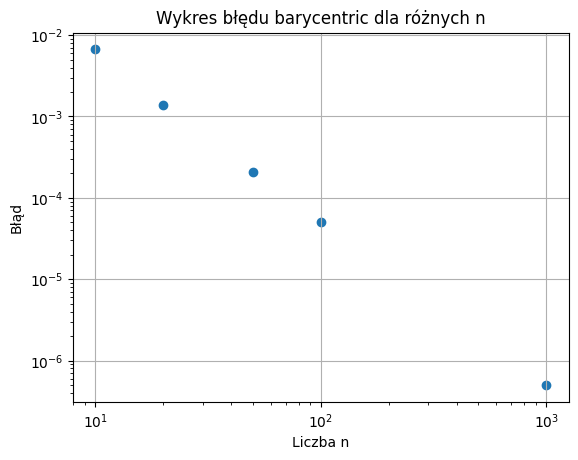

In [68]:
X = np.linspace(-0.99,0.99,1000)
#dla n = 10 
x10 = np.linspace(-1,1,10)
y10 = f2(x10)
w10 = main.bar_czeb_weights(9)
Y10 = main.barycentric_inte(x10,y10,w10,X)
error10bar = main.L_inf(Y10, f2(X))
print("Dla 10: " , error10bar)

#dla n = 20 
x20 = np.linspace(-1,1,20)
y20 = f2(x20)
w20 = main.bar_czeb_weights(19)
Y20 = main.barycentric_inte(x20,y20,w20,X)
error20bar = main.L_inf(Y20, f2(X))
print("Dla 20: " , error20bar)

#dla n = 50 
x50 = np.linspace(-1,1,50)
y50 = f2(x50)
w50 = main.bar_czeb_weights(49)
Y50 = main.barycentric_inte(x50,y50,w50,X)
error50bar = main.L_inf(Y50, f2(X))
print("Dla 50: " , error50bar)

#dla n = 100 
x100 = np.linspace(-1,1,100)
y100 = f2(x100)
w100 = main.bar_czeb_weights(99)
Y100 = main.barycentric_inte(x100,y100,w100,X)
error100bar = main.L_inf(Y100, f2(X))
print("Dla 100: " , error100bar)

#dla n = 1000 
x1000 = np.linspace(-1,1,1000)
y1000 = f2(x1000)
w1000 = main.bar_czeb_weights(999)
Y1000 = main.barycentric_inte(x1000,y1000,w1000,X)
error1000bar = main.L_inf(Y1000, f2(X))
print("Dla 1000: " , error1000bar)


errorbar = [error10bar , error20bar , error50bar , error100bar , error1000bar]
n = [10, 20, 50, 100, 1000]
print("Errorbar: ", errorbar)


plt.scatter(n, errorbar)
plt.xscale('log')
plt.yscale('log')
plt.title("Wykres błędu barycentric dla różnych n")
plt.xlabel("Liczba n")
plt.ylabel("Błąd")
plt.grid()
plt.show()


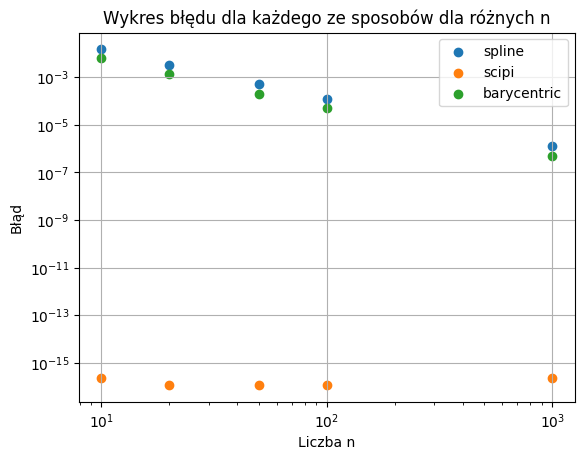

In [69]:
#Wykres wszytkich błędów na jednym wykresie 


plt.scatter(n, errorspline, label="spline")
plt.xscale('log')
plt.yscale('log')
plt.title("Wykres błędu dla każdego ze sposobów dla różnych n")
plt.xlabel("Liczba n")
plt.ylabel("Błąd")
plt.grid()
plt.scatter(n, errorscipi , label="scipi")
plt.scatter(n, errorbar , label = 'barycentric')
plt.legend()
plt.show()



***Zadanie 4.***  
Zaimplementuj funkcję interpolującą sklejaną trzeciego rzędu (splajn kubiczny). Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji wielomianowych w poszczególnych przedziałach.

***Podpowiedź***

https://medium.com/eatpredlove/natural-cubic-splines-implementation-with-python-edf68feb57aa



***Zadania 5.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


In [70]:
def PolyCoefficients2(x, x0, coeffs):
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*(x - x0)**i
    return y

DLA FUNKCJI Z ZADANIA 4

Bład dla n= 10:  0.14287413801237903
Bład dla n= 20:  0.012335562588910998
Bład dla n= 50:  0.00014844455986873228
Bład dla n= 100:  7.028408402609543e-06
Errorcub4:  [0.14287413801237903, 0.012335562588910998, 0.00014844455986873228, 7.028408402609543e-06]


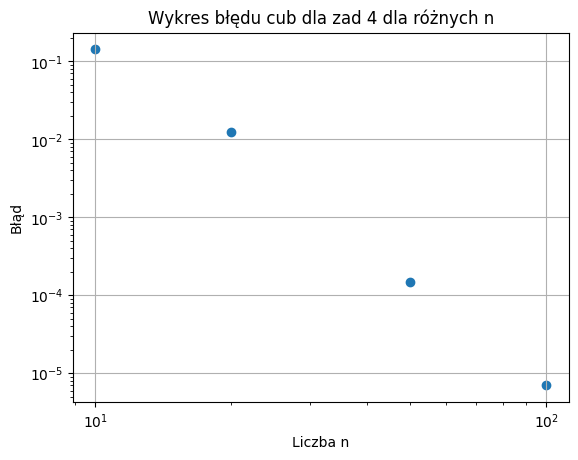

In [71]:
#funkcja ta jest ciągle podpisana pod f1 

#dla n=10 
x = np.linspace(-1, 1, 10)
y = f1(x)


b, c, d = main.cubic_spline(x, y)
f = [[y[i],b[i],c[i],d[i]] for i in range(len(b))]

X = np.array([])
Y = np.array([])

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    y_new = PolyCoefficients2(x_new, x[i], f[i])

    X = np.append(X, x_new)
    Y = np.append(Y, y_new)
    

errorcub10 = main.L_inf(Y, f1(X))   
print("Bład dla n= 10: ", errorcub10)


#dla n=20 
x = np.linspace(-1, 1, 20)
y = f1(x)


b, c, d = main.cubic_spline(x, y)
f = [[y[i],b[i],c[i],d[i]] for i in range(len(b))]

X = np.array([])
Y = np.array([])

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    y_new = PolyCoefficients2(x_new, x[i], f[i])

    X = np.append(X, x_new)
    Y = np.append(Y, y_new)
    

errorcub20 = main.L_inf(Y, f1(X))   
print("Bład dla n= 20: ", errorcub20)

#dla n=50 
x = np.linspace(-1, 1, 50)
y = f1(x)


b, c, d = main.cubic_spline(x, y)
f = [[y[i],b[i],c[i],d[i]] for i in range(len(b))]

X = np.array([])
Y = np.array([])

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    y_new = PolyCoefficients2(x_new, x[i], f[i])

    X = np.append(X, x_new)
    Y = np.append(Y, y_new)
    

errorcub50 = main.L_inf(Y, f1(X))   
print("Bład dla n= 50: ", errorcub50)

#dla n=100 
x = np.linspace(-1, 1, 100)
y = f1(x)


b, c, d = main.cubic_spline(x, y)
f = [[y[i],b[i],c[i],d[i]] for i in range(len(b))]

X = np.array([])
Y = np.array([])

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    y_new = PolyCoefficients2(x_new, x[i], f[i])

    X = np.append(X, x_new)
    Y = np.append(Y, y_new)
    

errorcub100 = main.L_inf(Y, f1(X))   
print("Bład dla n= 100: ", errorcub100)
  

errorcub = [errorcub10 , errorcub20  , errorcub50  , errorcub100]
n = [10, 20, 50, 100]
print("Errorcub4: ", errorcub)


plt.scatter(n, errorcub)
plt.xscale('log')
plt.yscale('log')
plt.title("Wykres błędu cub dla zad 4 dla różnych n")
plt.xlabel("Liczba n")
plt.ylabel("Błąd")
plt.grid()
plt.show()

#Usuniete zostało dla n = 1000, ponieważ za dlugo kod się wykonywał





Blad 10 wynosi: 1.1102230246251565e-16
Blad 20 wynosi: 1.6653345369377348e-16
Blad 50 wynosi: 2.220446049250313e-16
Blad 100 wynosi: 2.220446049250313e-16


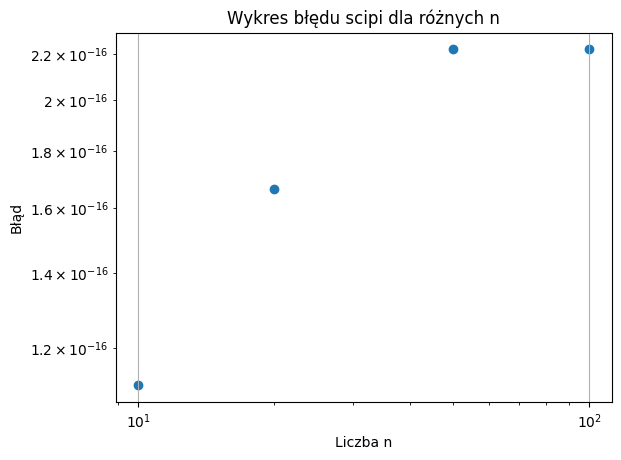

In [72]:
from scipy.interpolate import splprep, splev, splrep

#dla n = 10 
x = np.linspace(-0.99,0.99, 10)
y = f1(x)
tck, u = splprep([x, y], s=0)
new_points10 = splev(u, tck)
#plt.plot(new_points[0], new_points[1])
new10 = np.array(new_points10)
error10scipi =  main.L_inf(new10[1],y)
print("Blad 10 wynosi:" , error10scipi)

#dla n = 20 
x = np.linspace(-0.99,0.99, 20)
y = f1(x)
tck, u = splprep([x, y], s=0)
new_points20 = splev(u, tck)
#plt.plot(new_points[0], new_points[1])
new = np.array(new_points20)
error20scipi =  main.L_inf(new[1],y)
print("Blad 20 wynosi:" , error20scipi)

#dla n = 50 
x = np.linspace(-0.99,0.99, 50)
y = f1(x)
tck, u = splprep([x, y], s=0)
new_points50 = splev(u, tck)
#plt.plot(new_points[0], new_points[1])
new50 = np.array(new_points50)
error50scipi =  main.L_inf(new50[1],y)
print("Blad 50 wynosi:" , error50scipi)

#dla n = 100 
x = np.linspace(-0.99,0.99, 100)
y = f1(x)
tck, u = splprep([x, y], s=0)
new_points100 = splev(u, tck)
#plt.plot(new_points[0], new_points[1])
new100 = np.array(new_points100)
error100scipi =  main.L_inf(new100[1],y)
print("Blad 100 wynosi:" , error100scipi)



errorscipi = [error10scipi, error20scipi, error50scipi, error100scipi]
n = [10, 20, 50, 100]


plt.scatter(n, errorscipi)
plt.xscale('log')
plt.yscale('log')
plt.title("Wykres błędu scipi dla różnych n")
plt.xlabel("Liczba n")
plt.ylabel("Błąd")
plt.grid()
plt.show()





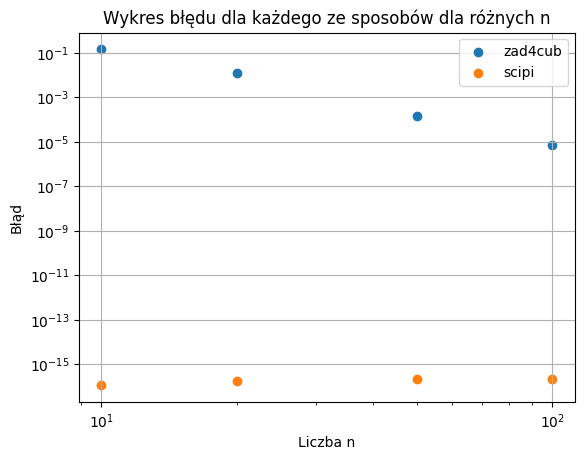

In [73]:
#Wykres wszytkich błędów na jednym wykresie 


plt.scatter(n, errorcub, label="zad4cub")
plt.xscale('log')
plt.yscale('log')
plt.title("Wykres błędu dla każdego ze sposobów dla różnych n")
plt.xlabel("Liczba n")
plt.ylabel("Błąd")
plt.grid()
plt.scatter(n, errorscipi , label="scipi")
plt.legend()
plt.show()

***Zadanie 6.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


ZADANIE 4

Bład dla n= 10:  0.0006308009150036709
Bład dla n= 20:  0.0003584358614091565
Bład dla n= 50:  6.285557218055349e-05
Bład dla n= 100:  1.569862454575688e-05
Errorcub4:  [0.0006308009150036709, 0.0003584358614091565, 6.285557218055349e-05, 1.569862454575688e-05]


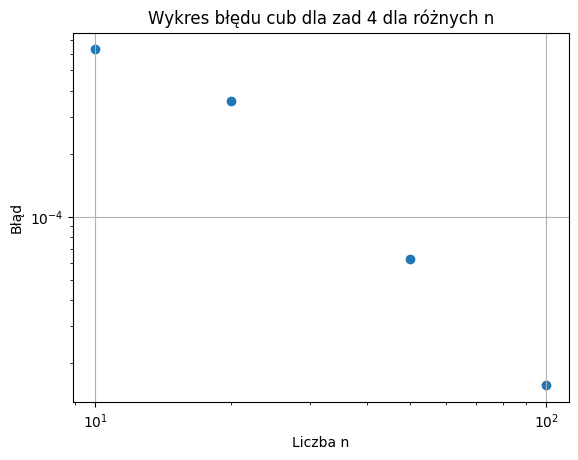

In [74]:
#funkcja ta jest ciągle podpisana pod f2 

#dla n=10 
x = np.linspace(-1, 1, 10)
y = f2(x)


b, c, d = main.cubic_spline(x, y)
f = [[y[i],b[i],c[i],d[i]] for i in range(len(b))]

X = np.array([])
Y = np.array([])

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    y_new = PolyCoefficients2(x_new, x[i], f[i])

    X = np.append(X, x_new)
    Y = np.append(Y, y_new)
    

errorcub10 = main.L_inf(Y, f2(X))   
print("Bład dla n= 10: ", errorcub10)


#dla n=20 
x = np.linspace(-1, 1, 20)
y = f2(x)


b, c, d = main.cubic_spline(x, y)
f = [[y[i],b[i],c[i],d[i]] for i in range(len(b))]

X = np.array([])
Y = np.array([])

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    y_new = PolyCoefficients2(x_new, x[i], f[i])

    X = np.append(X, x_new)
    Y = np.append(Y, y_new)
    

errorcub20 = main.L_inf(Y, f2(X))   
print("Bład dla n= 20: ", errorcub20)

#dla n=50 
x = np.linspace(-1, 1, 50)
y = f2(x)


b, c, d = main.cubic_spline(x, y)
f = [[y[i],b[i],c[i],d[i]] for i in range(len(b))]

X = np.array([])
Y = np.array([])

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    y_new = PolyCoefficients2(x_new, x[i], f[i])

    X = np.append(X, x_new)
    Y = np.append(Y, y_new)
    

errorcub50 = main.L_inf(Y, f2(X))   
print("Bład dla n= 50: ", errorcub50)

#dla n=100 
x = np.linspace(-1, 1, 100)
y = f2(x)


b, c, d = main.cubic_spline(x, y)
f = [[y[i],b[i],c[i],d[i]] for i in range(len(b))]

X = np.array([])
Y = np.array([])

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    y_new = PolyCoefficients2(x_new, x[i], f[i])

    X = np.append(X, x_new)
    Y = np.append(Y, y_new)
    

errorcub100 = main.L_inf(Y, f2(X))   
print("Bład dla n= 100: ", errorcub100)
  

errorcub = [errorcub10 , errorcub20  , errorcub50  , errorcub100]
n = [10, 20, 50, 100]
print("Errorcub4: ", errorcub)


plt.scatter(n, errorcub)
plt.xscale('log')
plt.yscale('log')
plt.title("Wykres błędu cub dla zad 4 dla różnych n")
plt.xlabel("Liczba n")
plt.ylabel("Błąd")
plt.grid()
plt.show()


SCIPI

Blad 10 wynosi: 2.220446049250313e-16
Blad 20 wynosi: 1.1102230246251565e-16
Blad 50 wynosi: 1.1102230246251565e-16
Blad 100 wynosi: 1.1102230246251565e-16


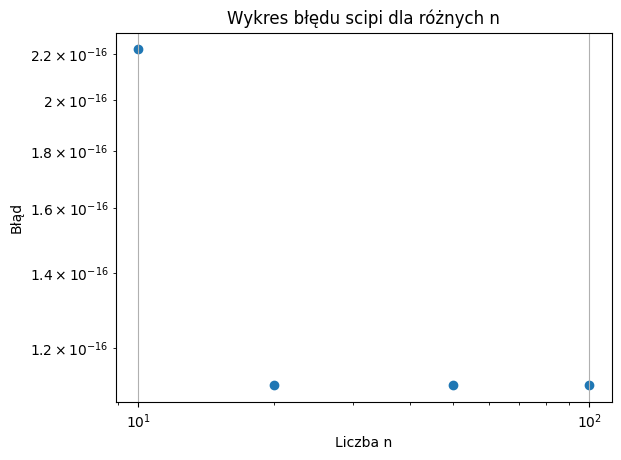

In [75]:
from scipy.interpolate import splprep, splev, splrep

#dla n = 10 
x = np.linspace(-0.99,0.99, 10)
y = f2(x)
tck, u = splprep([x, y], s=0)
new_points10 = splev(u, tck)
#plt.plot(new_points[0], new_points[1])
new10 = np.array(new_points10)
error10scipi =  main.L_inf(new10[1],y)
print("Blad 10 wynosi:" , error10scipi)

#dla n = 20 
x = np.linspace(-0.99,0.99, 20)
y = f2(x)
tck, u = splprep([x, y], s=0)
new_points20 = splev(u, tck)
#plt.plot(new_points[0], new_points[1])
new = np.array(new_points20)
error20scipi =  main.L_inf(new[1],y)
print("Blad 20 wynosi:" , error20scipi)

#dla n = 50 
x = np.linspace(-0.99,0.99, 50)
y = f2(x)
tck, u = splprep([x, y], s=0)
new_points50 = splev(u, tck)
#plt.plot(new_points[0], new_points[1])
new50 = np.array(new_points50)
error50scipi =  main.L_inf(new50[1],y)
print("Blad 50 wynosi:" , error50scipi)

#dla n = 100 
x = np.linspace(-0.99,0.99, 100)
y = f2(x)
tck, u = splprep([x, y], s=0)
new_points100 = splev(u, tck)
#plt.plot(new_points[0], new_points[1])
new100 = np.array(new_points100)
error100scipi =  main.L_inf(new100[1],y)
print("Blad 100 wynosi:" , error100scipi)



errorscipi = [error10scipi, error20scipi, error50scipi, error100scipi]
n = [10, 20, 50, 100]


plt.scatter(n, errorscipi)
plt.xscale('log')
plt.yscale('log')
plt.title("Wykres błędu scipi dla różnych n")
plt.xlabel("Liczba n")
plt.ylabel("Błąd")
plt.grid()
plt.show()





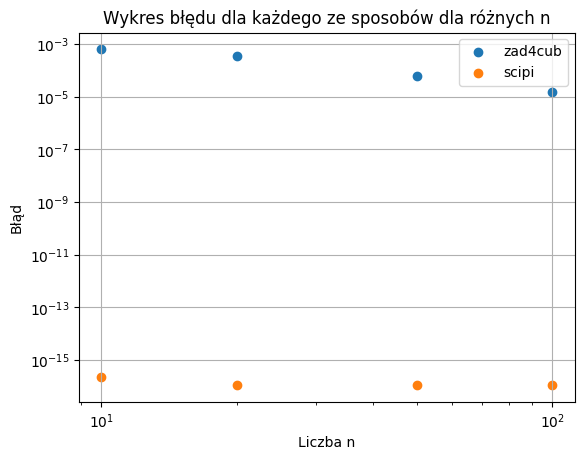

In [76]:
#Wykres wszytkich błędów na jednym wykresie 


plt.scatter(n, errorcub, label="zad4cub")
plt.xscale('log')
plt.yscale('log')
plt.title("Wykres błędu dla każdego ze sposobów dla różnych n")
plt.xlabel("Liczba n")
plt.ylabel("Błąd")
plt.grid()
plt.scatter(n, errorscipi , label="scipi")
plt.legend()
plt.show()

***Zadanie 7.***  
Dla funkcji:
### $f(x) = |sin(5x)|^3$

Porównać działanie funkcji zaimplementowanych w Zadaniu 1 oraz 4 oraz przedstawić wyniki na odpowiednich wykresach.

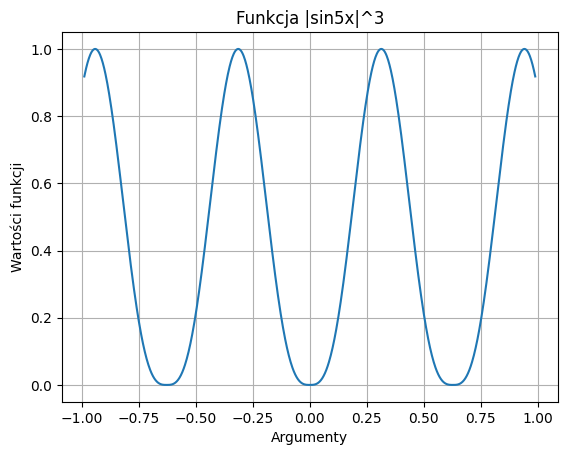

In [77]:
f3 = lambda x : np.abs((np.sin(5*x))**3)
#Wywołanie zwykłej funkcji 
x = np.linspace(-0.99,0.99, 1000)
y = f3(x)
plt.plot(x, y)
plt.title('Funkcja |sin5x|^3')
plt.xlabel("Argumenty")
plt.ylabel("Wartości funkcji")
plt.grid()
plt.show()


ZADANIE 4

Bład dla n= 10:  0.29460251738449883
Bład dla n= 20:  0.040438448503251734
Bład dla n= 50:  0.004644056584066969
Bład dla n= 100:  0.0011031213883313518
Errorcub4:  [0.29460251738449883, 0.040438448503251734, 0.004644056584066969, 0.0011031213883313518]


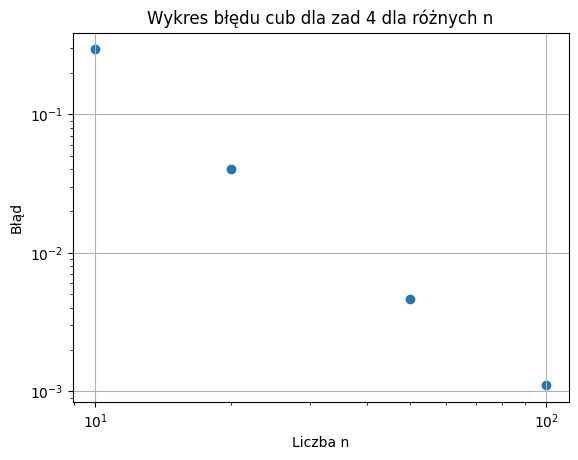

In [78]:
#funkcja ta jest ciągle podpisana pod f3 

#dla n=10 
x = np.linspace(-1, 1, 10)
y = f3(x)


b, c, d = main.cubic_spline(x, y)
f = [[y[i],b[i],c[i],d[i]] for i in range(len(b))]

X = np.array([])
Y = np.array([])

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    y_new = PolyCoefficients2(x_new, x[i], f[i])

    X = np.append(X, x_new)
    Y = np.append(Y, y_new)
    

errorcub10 = main.L_inf(Y, f3(X))   
print("Bład dla n= 10: ", errorcub10)


#dla n=20 
x = np.linspace(-1, 1, 20)
y = f3(x)


b, c, d = main.cubic_spline(x, y)
f = [[y[i],b[i],c[i],d[i]] for i in range(len(b))]

X = np.array([])
Y = np.array([])

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    y_new = PolyCoefficients2(x_new, x[i], f[i])

    X = np.append(X, x_new)
    Y = np.append(Y, y_new)
    

errorcub20 = main.L_inf(Y, f3(X))   
print("Bład dla n= 20: ", errorcub20)

#dla n=50 
x = np.linspace(-1, 1, 50)
y = f3(x)


b, c, d = main.cubic_spline(x, y)
f = [[y[i],b[i],c[i],d[i]] for i in range(len(b))]

X = np.array([])
Y = np.array([])

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    y_new = PolyCoefficients2(x_new, x[i], f[i])

    X = np.append(X, x_new)
    Y = np.append(Y, y_new)
    

errorcub50 = main.L_inf(Y, f3(X))   
print("Bład dla n= 50: ", errorcub50)

#dla n=100 
x = np.linspace(-1, 1, 100)
y = f3(x)


b, c, d = main.cubic_spline(x, y)
f = [[y[i],b[i],c[i],d[i]] for i in range(len(b))]

X = np.array([])
Y = np.array([])

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    y_new = PolyCoefficients2(x_new, x[i], f[i])

    X = np.append(X, x_new)
    Y = np.append(Y, y_new)
    

errorcub100 = main.L_inf(Y, f3(X))   
print("Bład dla n= 100: ", errorcub100)
  

errorcub = [errorcub10 , errorcub20  , errorcub50  , errorcub100]
n = [10, 20, 50, 100]
print("Errorcub4: ", errorcub)


plt.scatter(n, errorcub)
plt.xscale('log')
plt.yscale('log')
plt.title("Wykres błędu cub dla zad 4 dla różnych n")
plt.xlabel("Liczba n")
plt.ylabel("Błąd")
plt.grid()
plt.show()


SCIPI

Blad 10 wynosi: 2.220446049250313e-16
Blad 20 wynosi: 2.220446049250313e-16
Blad 50 wynosi: 3.3306690738754696e-16
Blad 100 wynosi: 4.440892098500626e-16


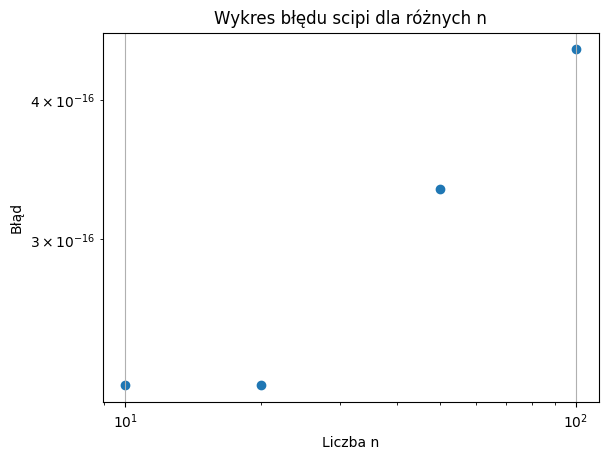

In [79]:
from scipy.interpolate import splprep, splev, splrep

#dla n = 10 
x = np.linspace(-0.99,0.99, 10)
y = f3(x)
tck, u = splprep([x, y], s=0)
new_points10 = splev(u, tck)
#plt.plot(new_points[0], new_points[1])
new10 = np.array(new_points10)
error10scipi =  main.L_inf(new10[1],y)
print("Blad 10 wynosi:" , error10scipi)

#dla n = 20 
x = np.linspace(-0.99,0.99, 20)
y = f3(x)
tck, u = splprep([x, y], s=0)
new_points20 = splev(u, tck)
#plt.plot(new_points[0], new_points[1])
new = np.array(new_points20)
error20scipi =  main.L_inf(new[1],y)
print("Blad 20 wynosi:" , error20scipi)

#dla n = 50 
x = np.linspace(-0.99,0.99, 50)
y = f3(x)
tck, u = splprep([x, y], s=0)
new_points50 = splev(u, tck)
#plt.plot(new_points[0], new_points[1])
new50 = np.array(new_points50)
error50scipi =  main.L_inf(new50[1],y)
print("Blad 50 wynosi:" , error50scipi)

#dla n = 100 
x = np.linspace(-0.99,0.99, 100)
y = f3(x)
tck, u = splprep([x, y], s=0)
new_points100 = splev(u, tck)
#plt.plot(new_points[0], new_points[1])
new100 = np.array(new_points100)
error100scipi =  main.L_inf(new100[1],y)
print("Blad 100 wynosi:" , error100scipi)



errorscipi = [error10scipi, error20scipi, error50scipi, error100scipi]
n = [10, 20, 50, 100]


plt.scatter(n, errorscipi)
plt.xscale('log')
plt.yscale('log')
plt.title("Wykres błędu scipi dla różnych n")
plt.xlabel("Liczba n")
plt.ylabel("Błąd")
plt.grid()
plt.show()





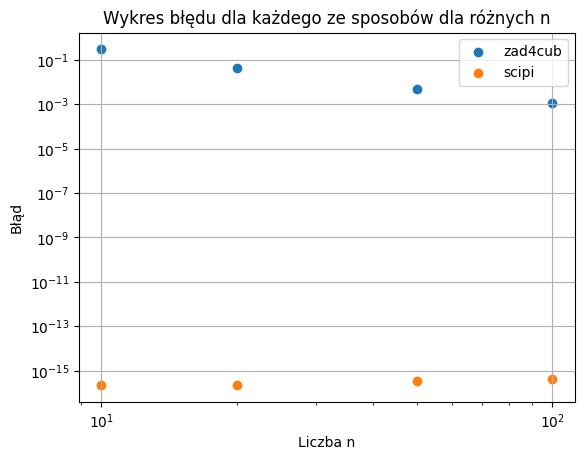

In [80]:
#Wykres wszytkich błędów na jednym wykresie 


plt.scatter(n, errorcub, label="zad4cub")
plt.xscale('log')
plt.yscale('log')
plt.title("Wykres błędu dla każdego ze sposobów dla różnych n")
plt.xlabel("Liczba n")
plt.ylabel("Błąd")
plt.grid()
plt.scatter(n, errorscipi , label="scipi")
plt.legend()
plt.show()

WNIOSKI

Zadanie polegało na sprawdzeniu 3 metod do interpolacji. Na początku należało zaimplementawać odpowiednie funkcje oraz przekopiować z poprzednich zajeć niektóre z nich. ponieważ były potrzebne do niektórych zadań. Następnie zadanie polegało na interpolacji jakiejś funkcji ze względu na różne wartości n oraz różne sposoby. Dzięki poprzednim zajęciom wiadomo było, że im większe n tym lepsza dokładność dlatego jedyne co wyświetlałem to błąd. Następnie porównywałem te błędy w zależności od n. Tutaj dla funkcji z 1 zadania błąd się zmniejszał wraz z n, identycznie było dla barycentric, natomiast dla scipi bład był na granicy zera maszynowego cały czas. Dokładnie takie same efekty można było zarejstrować przy innych funkcjach jak i funckji cubic. 